In [62]:

import numpy as np 
import pandas as pd 

import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline    
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
from sklearn import metrics

In [63]:

import numpy as np        
import pandas as pd       
import matplotlib.pyplot as plt  
%matplotlib inline




import nltk
from nltk.corpus import stopwords   



nltk.download('stopwords')   
nltk.download('punkt')       


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


False

In [64]:

df = pd.read_csv('spam.csv', encoding='latin1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [65]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [67]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [68]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [69]:

df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

In [70]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [71]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [72]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


Text(0, 0.5, 'Number of Data points')

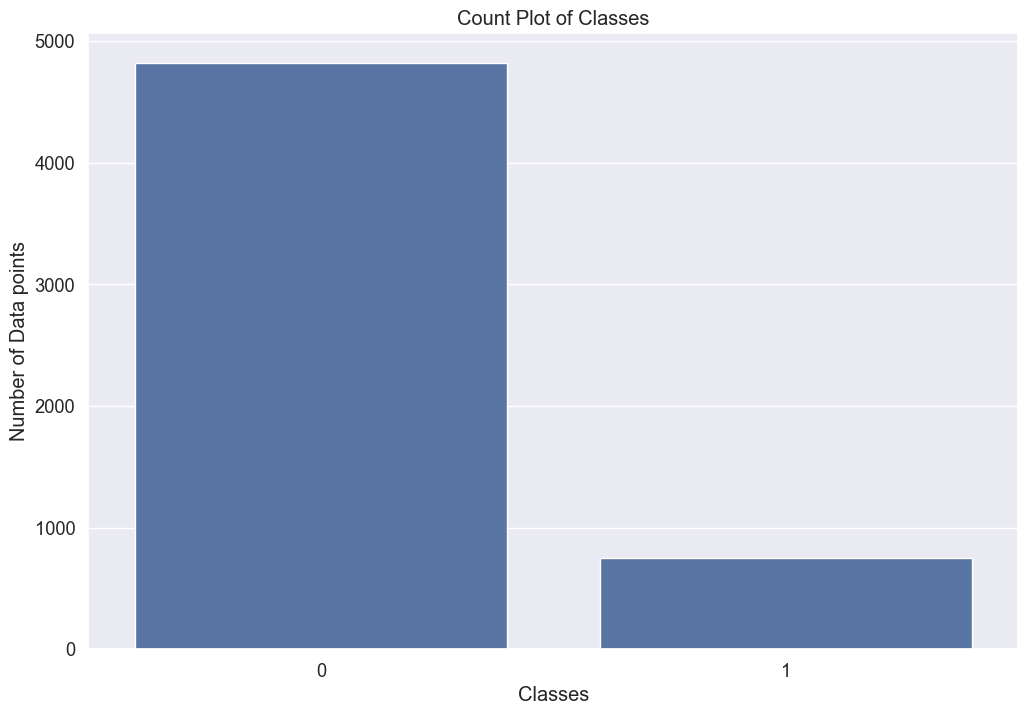

In [73]:
cols= ["#E1F16B", "#E598D8"] 

plt.figure(figsize=(12,8))
fg = sns.countplot(x= df["target"])
fg.set_title("Count Plot of Classes", )
fg.set_xlabel("Classes", )
fg.set_ylabel("Number of Data points", )

In [74]:
#check missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [75]:
#check duplicate values
df.duplicated().sum()

403

In [76]:
#remove duplicate
df = df.drop_duplicates(keep = 'first')

In [77]:
df.shape

(5169, 2)

In [78]:
values = df['target'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 87.3669955503966
percentage of 1 : 12.633004449603405


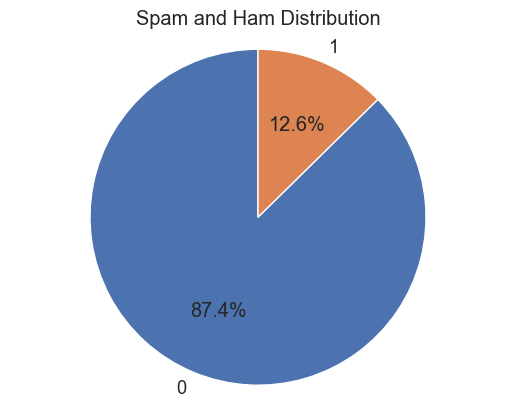

In [79]:

labels = ['0', '1']
sizes = [percentage_0, percentage_1]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Eşit ölçeklendirme ile daire şeklini korur


plt.title('Spam and Ham Distribution')
plt.show()


In [80]:
import nltk

nltk.download('punkt')


df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
/var/folders/n9/dyz67bm507g20qq535sygw2c0000gn/T/ipykernel_59671/207869153.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)
/var/folders/n9/dyz67bm507g20qq535sygw2c0000gn/T/ipykernel_59671/207869153.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = d

In [81]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [82]:
#ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


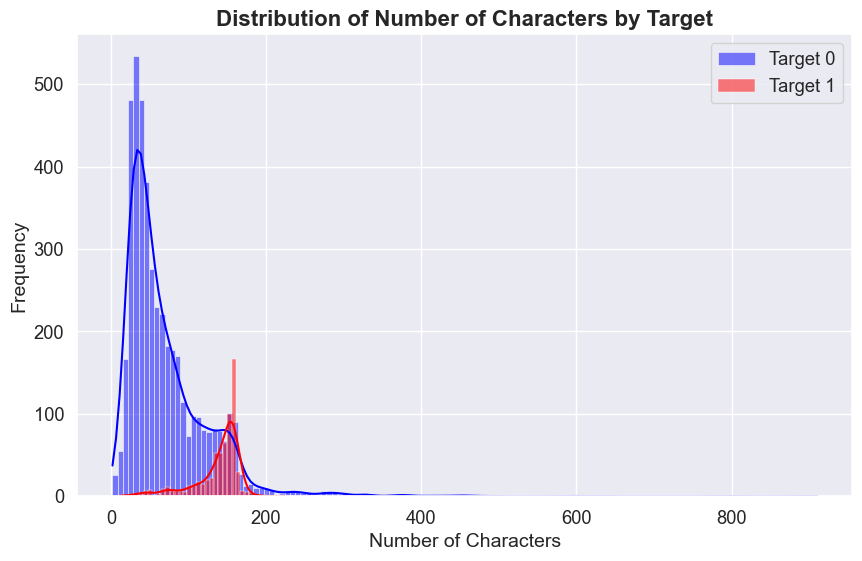

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))


sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)


sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Target 1', kde=True)


plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

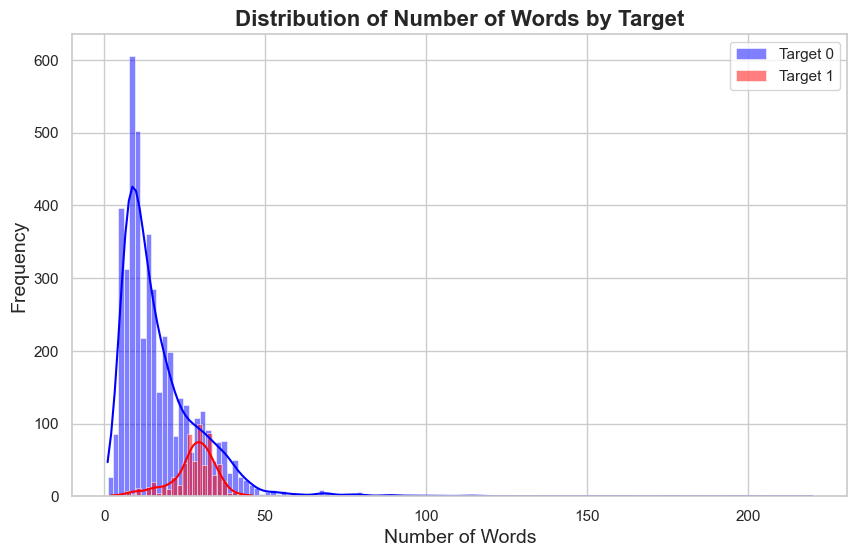

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  

# Show the plot
plt.show()

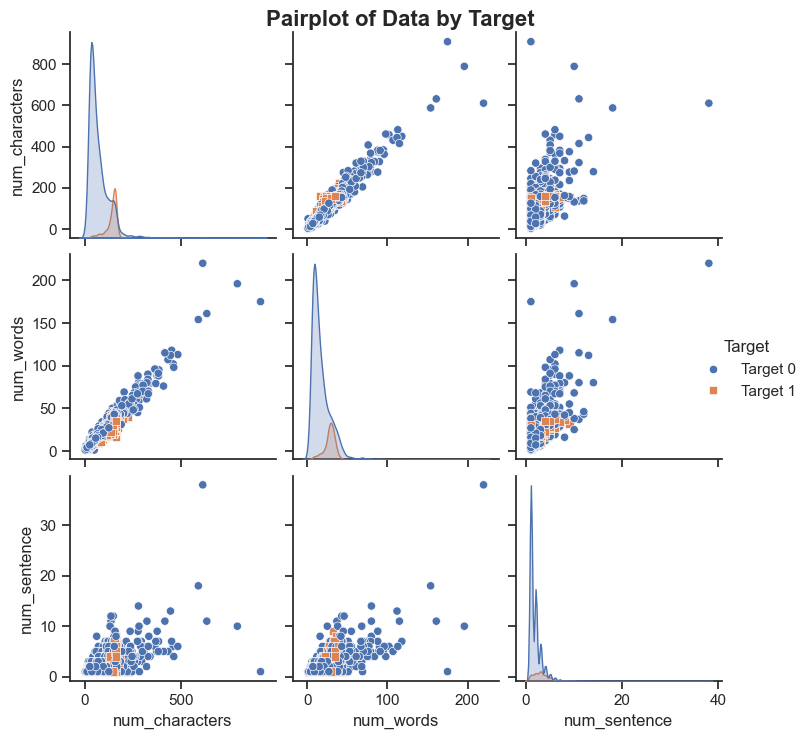

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot with custom styling
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df, hue='target', diag_kind='kde', markers=["o", "s"])

# Set a title for the pairplot
g.fig.suptitle("Pairplot of Data by Target", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  

# Customize the legend
g._legend.set_title('Target')
for t, l in zip(g._legend.texts, ["Target 0", "Target 1"]):
    t.set_text(l)

# Show the pairplot
plt.show()


In [86]:
df[['target','num_characters', 'num_words', 'num_sentence']].corr()

,target,num_characters,num_words,num_sentence
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentence,0.263939,0.624139,0.679971,1.000000


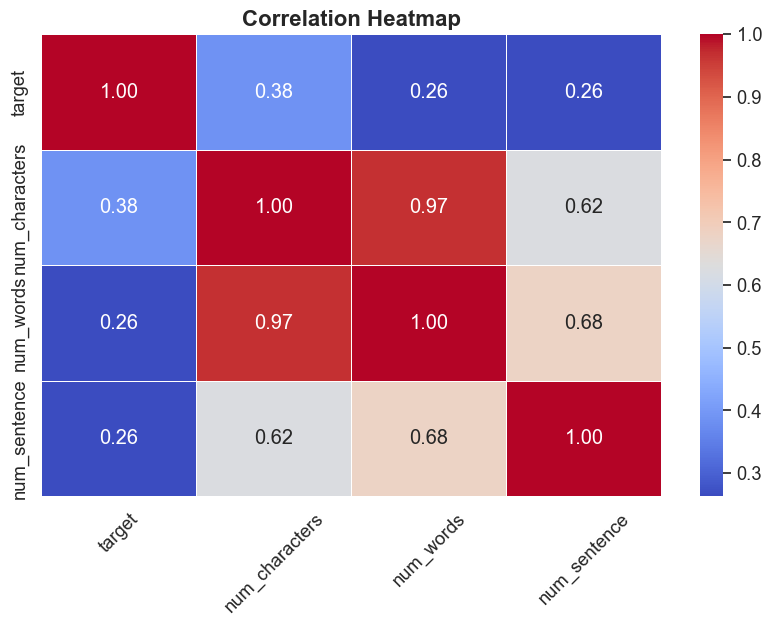

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df[['target', 'num_characters', 'num_words', 'num_sentence']].corr()


plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")


plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')


plt.xticks(rotation=45)


plt.show()


# DATA PREPROCESSING


In [88]:

from nltk.stem.porter import PorterStemmer


import string


ps = PorterStemmer()


def transform_text(text):
    
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
    
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    
    text = y[:]
    y.clear()
    
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    
    return " ".join(y)


In [89]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

### 6.1 | Creating a New Column: 'transformed_text'

In [90]:
df_original=df
df['transformed_text'] = df['text'].apply(transform_text)

/var/folders/n9/dyz67bm507g20qq535sygw2c0000gn/T/ipykernel_59671/1647843810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [91]:
df.head(5)


,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [92]:
spam_carpos = []
for sentence in df[df['target'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

In [93]:
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

/var/folders/n9/dyz67bm507g20qq535sygw2c0000gn/T/ipykernel_59671/2512895475.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')


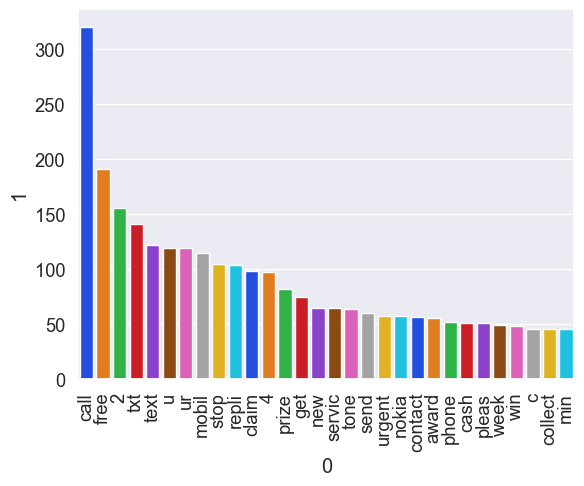

In [94]:
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

In [35]:
ham_carpos = []
for sentence in df[df['target'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

In [36]:
filter_ham_df = pd.DataFrame(Counter(ham_carpos).most_common(30))

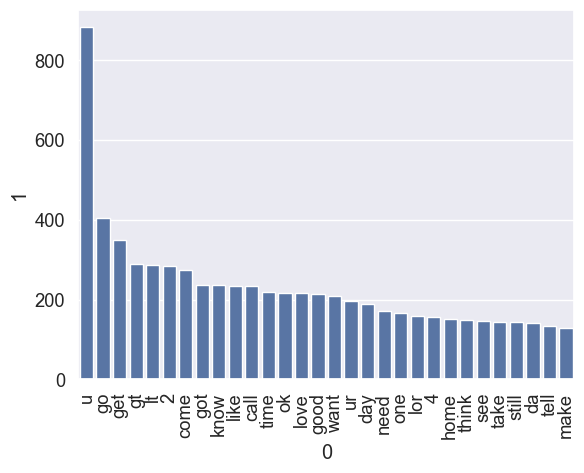

In [37]:
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1])
plt.xticks(rotation = 90)
plt.show()

# PART 7


In [38]:
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#cv = CountVectorizer()
#tfid = TfidfVectorizer(max_features = 3000)

In [39]:
#X = tfid.fit_transform(df['transformed_text']).toarray()
#y = df['target'].values

In [40]:
#from sklearn.model_selection import train_test_split

# Özellikler ve hedef değişkeni ayırma
#X = df['text']
#y = df['target']

# Eğitim ve test setlerine bölme
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [96]:
from sklearn.model_selection import train_test_split
df=df_original

X = df['text']
y = df['target']

# Eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

#vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer(token_pattern='[a-zA-Z]+', lowercase=True)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier

In [99]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


performance_metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])


models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier()  
}


for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metrics = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1-Score': [f1]
    })
    
    performance_metrics = pd.concat([performance_metrics, metrics], ignore_index=True)

print(performance_metrics)


/var/folders/n9/dyz67bm507g20qq535sygw2c0000gn/T/ipykernel_59671/1196467134.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance_metrics = pd.concat([performance_metrics, metrics], ignore_index=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.970986   0.983193  0.806897  0.886364
1          Naive Bayes  0.959381   1.000000  0.710345  0.830645
2                  SVM  0.985493   0.977941  0.917241  0.946619
3        Random Forest  0.977756   0.991935  0.848276  0.914498
4             AdaBoost  0.972921   0.953488  0.848276  0.897810


# PART 8

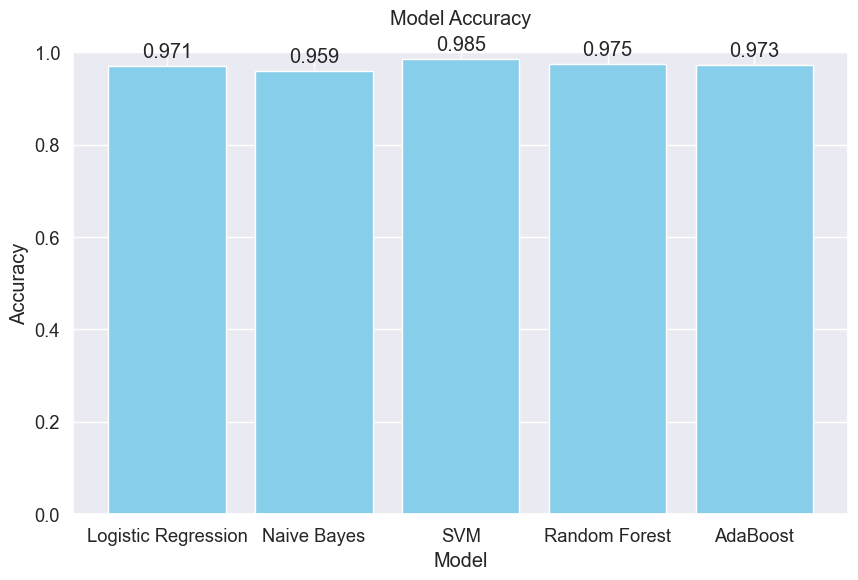

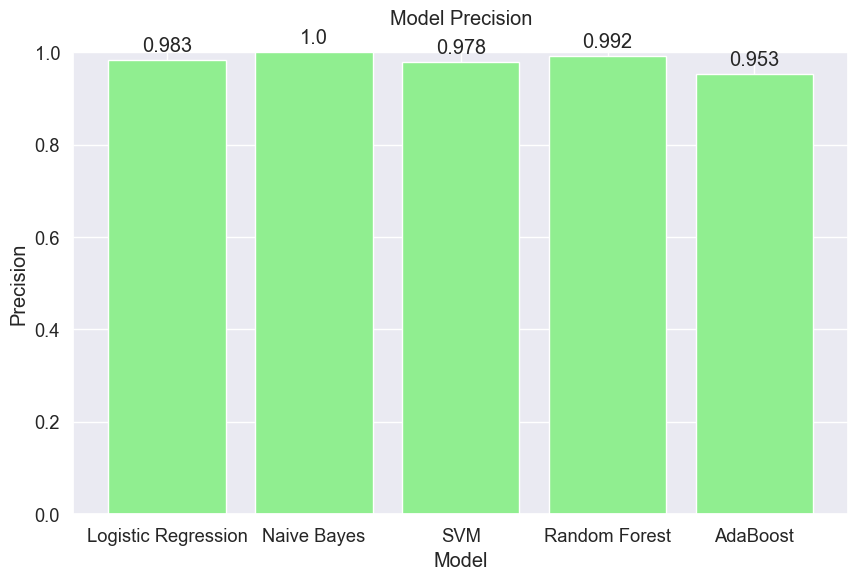

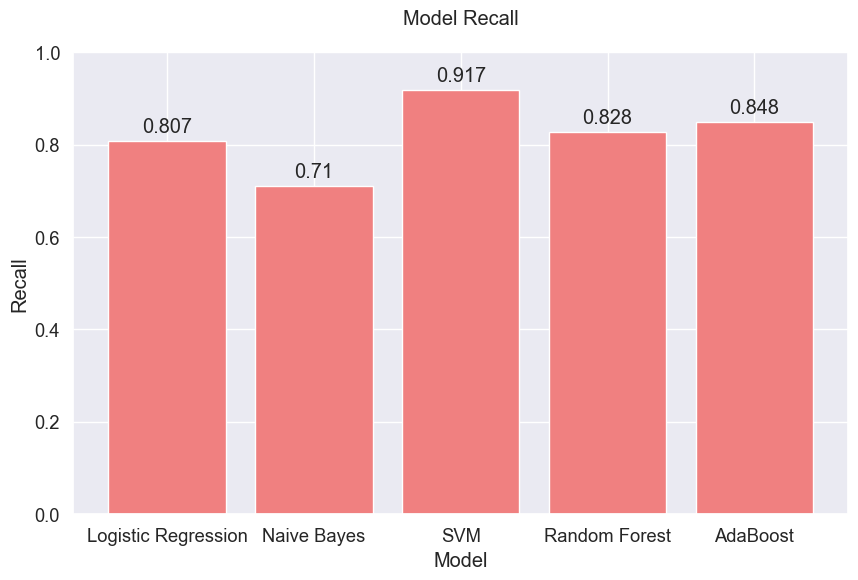

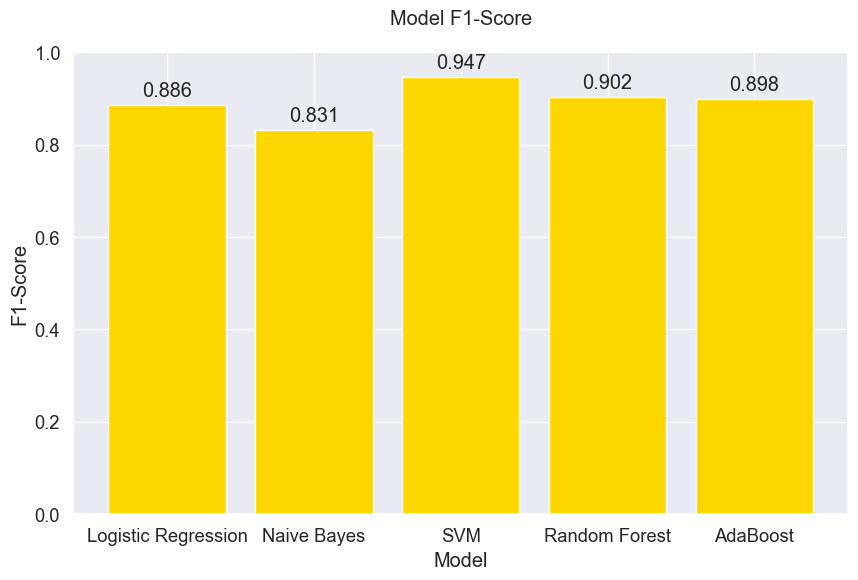

In [45]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
bars = plt.bar(performance_metrics['Model'], performance_metrics['Accuracy'], color='skyblue')
plt.title('Model Accuracy', pad=20)  
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')
plt.show()


plt.figure(figsize=(10, 6))
bars = plt.bar(performance_metrics['Model'], performance_metrics['Precision'], color='lightgreen')
plt.title('Model Precision', pad=20)  
plt.xlabel('Model')
plt.ylabel('Precision')
plt.ylim(0, 1)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')
plt.show()


plt.figure(figsize=(10, 6))
bars = plt.bar(performance_metrics['Model'], performance_metrics['Recall'], color='lightcoral')
plt.title('Model Recall', pad=20)  
plt.xlabel('Model')
plt.ylabel('Recall')
plt.ylim(0, 1)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')
plt.show()


plt.figure(figsize=(10, 6))
bars = plt.bar(performance_metrics['Model'], performance_metrics['F1-Score'], color='gold')
plt.title('Model F1-Score', pad=20) 
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.ylim(0, 1)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')
plt.show()


In [100]:
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
data = pad_sequences(sequences, maxlen=50)


X_train, X_test, y_train, y_test = train_test_split(data, df["target"], test_size=0.25, random_state=42)

In [101]:

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=50))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import Callback



class ModelCheckpointInMemory(Callback):
    def __init__(self):
        super(ModelCheckpointInMemory, self).__init__()
        self.best_weights = None
        self.best_val_loss = float('inf')

    def on_epoch_end(self, epoch, logs=None):
        
        current_val_loss = logs['val_loss']
        if current_val_loss < self.best_val_loss:
            self.best_val_loss = current_val_loss
            self.best_weights = self.model.get_weights()


checkpoint_in_memory = ModelCheckpointInMemory()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.8674 - loss: 0.3780 - val_accuracy: 0.9753 - val_loss: 0.1051
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9811 - loss: 0.0803 - val_accuracy: 0.9822 - val_loss: 0.0562
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.9911 - loss: 0.0330 - val_accuracy: 0.9830 - val_loss: 0.0534
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9925 - loss: 0.0283 - val_accuracy: 0.9899 - val_loss: 0.0434
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9974 - loss: 0.0160 - val_accuracy: 0.9876 - val_loss: 0.0462
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9982 - loss: 0.0072 - val_accuracy: 0.9861 - val_loss: 0.0438
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9981 - loss: 0.0070 - val_accuracy: 0.9869 - val_loss: 0.0542
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.9989 - loss: 0.0053 - val_accuracy: 0.9869 - v

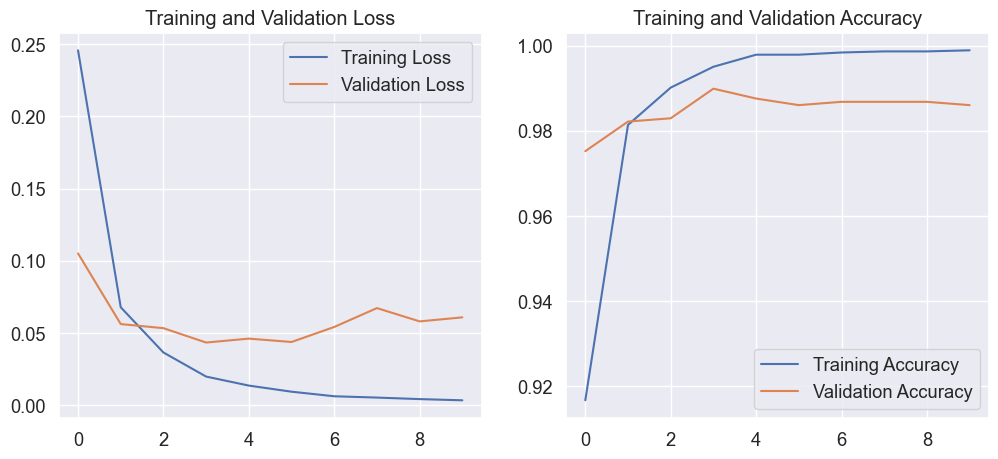

In [102]:

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[checkpoint_in_memory])


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()


In [103]:
if checkpoint_in_memory.best_weights is not None:
    model.set_weights(checkpoint_in_memory.best_weights)
else:
    print("No best model weights saved.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Test Sample Index: 1193, Predicted Probability of Spam: 0.9974, Actual Label: Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Test Sample Index: 1027, Predicted Probability of Spam: 0.0051, Actual Label: Ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Test Sample Index: 747, Predicted Probability of Spam: 0.0007, Actual Label: Ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Test Sample Index: 122, Predicted Probability of Spam: 0.0003, Actual Label: Ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Test Sample Index: 920, Predicted Probability of Spam: 0.0012, Actual Label: Ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Test Sample Index: 133, Predicted Probability of Spam: 0.0005, Actual Label: Ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Test Sample Index: 877, Predicted Probability of Spam: 0.9982, Actual Label: Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Test Sample Index: 664, Predicted Probability of Spam: 0.0008, Actual Label: Ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Test S

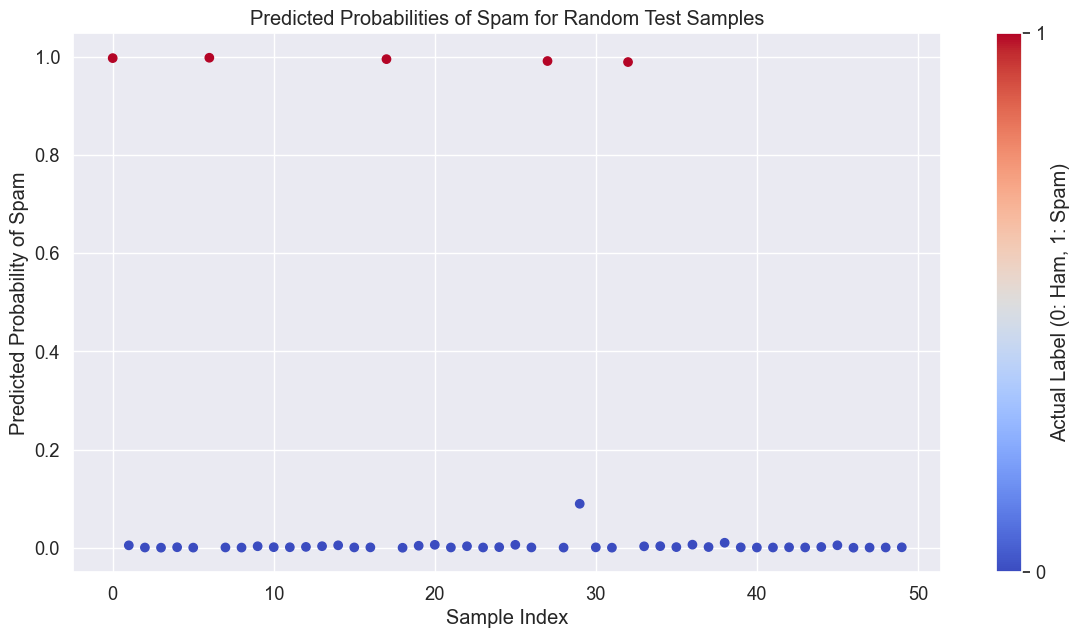

In [112]:
import random
predicted_probabilities = []
actual_labels = []


num_samples = 50
for _ in range(num_samples):
    idx = random.randint(0, len(X_test) - 1)
    test_sample = X_test[idx:idx+1]
    true_label = y_test.iloc[idx]
    
    prediction = model.predict(test_sample)[0][0]
    
    predicted_probabilities.append(prediction)
    actual_labels.append(true_label)

    print(f'Test Sample Index: {idx}, Predicted Probability of Spam: {prediction:.4f}, Actual Label: {"Spam" if true_label == 1 else "Ham"}')


plt.figure(figsize=(14, 7))
plt.scatter(range(num_samples), predicted_probabilities, c=actual_labels, cmap='coolwarm', label='Predicted Probability of Spam')
plt.colorbar(ticks=[0, 1], label='Actual Label (0: Ham, 1: Spam)')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability of Spam')
plt.title('Predicted Probabilities of Spam for Random Test Samples')
plt.show()

In [90]:
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
import torch




tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)


class SpamDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',  
            truncation=True, 
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }


def create_data_loader(X, y, tokenizer, max_len, batch_size):
    ds = SpamDataset(
        texts=X,
        labels=y,
        tokenizer=tokenizer,
        max_len=max_len
    )
    
    return DataLoader(ds, batch_size=batch_size, num_workers=0)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed inte

In [95]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


df = pd.read_csv('spam.csv', encoding='latin1')


df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)


df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)


encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])


df = df.drop_duplicates(keep='first')

# Eğitim ve test setlerine bölme
X = df['text'].values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [96]:
from transformers import AdamW
from torch.nn import CrossEntropyLoss
from tqdm import tqdm
import numpy as np

def train_epoch(model, data_loader, loss_fn, optimizer, device, n_examples):
    model = model.train()
    
    losses = []
    correct_predictions = 0
    
    for d in tqdm(data_loader):
        input_ids = d['input_ids'].to(device)
        attention_mask = d['attention_mask'].to(device)
        labels = d['labels'].to(device)
        
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        
        _, preds = torch.max(outputs.logits, dim=1)
        loss = loss_fn(outputs.logits, labels)
        
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    return correct_predictions.double() / n_examples, np.mean(losses)

def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    
    losses = []
    correct_predictions = 0
    
    with torch.no_grad():
        for d in data_loader:
            input_ids = d['input_ids'].to(device)
            attention_mask = d['attention_mask'].to(device)
            labels = d['labels'].to(device)
            
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            
            _, preds = torch.max(outputs.logits, dim=1)
            loss = loss_fn(outputs.logits, labels)
            
            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())
    
    return correct_predictions.double() / n_examples, np.mean(losses)


In [98]:
history = {
    'train_loss': [],
    'val_loss': [],
    'train_acc': [],
    'val_acc': []
}


In [99]:
for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)

    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        len(X_train)
    )

    print(f'Train loss {train_loss} accuracy {train_acc}')

    val_acc, val_loss = eval_model(
        model,
        test_data_loader,
        loss_fn,
        device,
        len(X_test)
    )

    print(f'Val   loss {val_loss} accuracy {val_acc}')
    print()

    
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['train_acc'].append(train_acc.item())  
    history['val_acc'].append(val_acc.item())      


Epoch 1/3
----------


100%|██████████| 259/259 [11:26<00:00,  2.65s/it]


Train loss 0.08483451936199801 accuracy 0.9760580411124546
Val   loss 0.031830410666477224 accuracy 0.9922630560928434

Epoch 2/3
----------


100%|██████████| 259/259 [16:31<00:00,  3.83s/it]


Train loss 0.019348950699038272 accuracy 0.9941958887545345
Val   loss 0.03682628334231245 accuracy 0.9893617021276596

Epoch 3/3
----------


100%|██████████| 259/259 [25:22<00:00,  5.88s/it]


Train loss 0.005379176269484051 accuracy 0.9987908101571947
Val   loss 0.04178324914335882 accuracy 0.9893617021276596



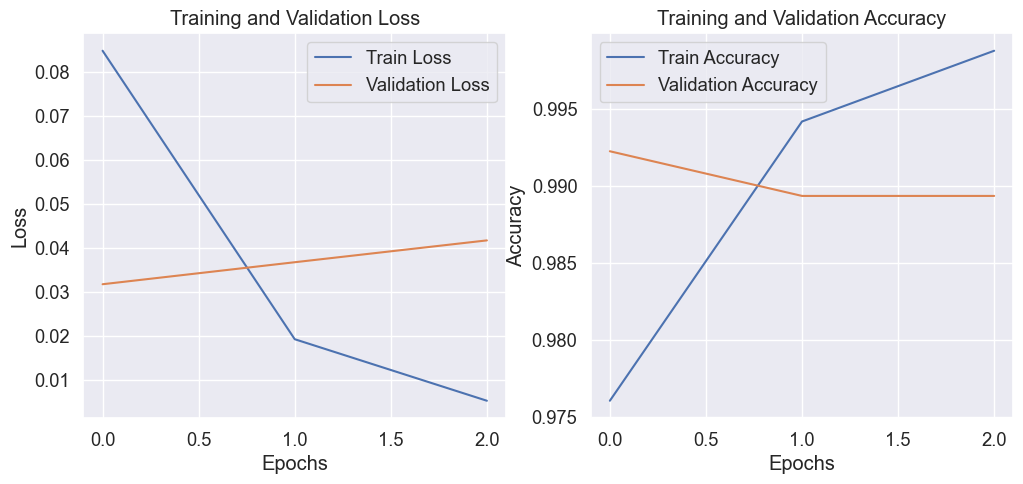

In [100]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)  
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Test Sample Index: 507, Predicted Probability of Spam: 0.0002, Actual Label: Ham
Test Sample Index: 728, Predicted Probability of Spam: 0.0001, Actual Label: Ham
Test Sample Index: 226, Predicted Probability of Spam: 0.9997, Actual Label: Spam
Test Sample Index: 687, Predicted Probability of Spam: 0.0002, Actual Label: Ham
Test Sample Index: 147, Predicted Probability of Spam: 0.0001, Actual Label: Ham
Test Sample Index: 3, Predicted Probability of Spam: 0.0001, Actual Label: Ham
Test Sample Index: 606, Predicted Probability of Spam: 0.0003, Actual Label: Ham
Test Sample Index: 194, Predicted Probability of Spam: 0.9998, Actual Label: Spam
Test Sample Index: 392, Predicted Probability of Spam: 0.0003, Actual Label: Ham
Test Sample Index: 981, Predicted Probability of Spam: 0.9998, Actual Label: Spam
Test Sample Index: 40, Predicted Probability of Spam: 0.9997, Actual Label: Spam
Test Sample Index: 876, Predicted Probability of Spam: 0.0005, Actual Label: Ham
Test Sample Index: 703, Pre

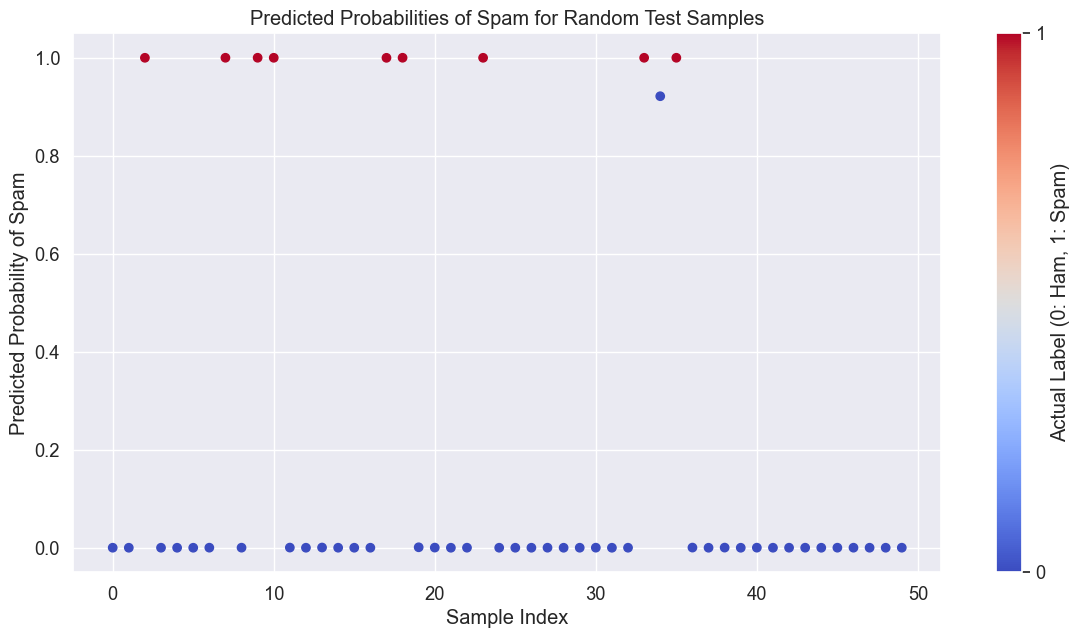

In [117]:
from transformers import BertTokenizer


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


encoded_input = tokenizer(X_test.tolist(), padding=True, truncation=True, return_tensors='pt')
input_ids = encoded_input['input_ids'].to(device)
attention_mask = encoded_input['attention_mask'].to(device)

predicted_probabilities = []
actual_labels = []


num_samples = 50
for _ in range(num_samples):
    idx = random.randint(0, len(X_test) - 1)
    test_sample_ids = input_ids[idx:idx+1]
    test_sample_mask = attention_mask[idx:idx+1]
    true_label = y_test[idx]
    
    with torch.no_grad():
        outputs = model(input_ids=test_sample_ids, attention_mask=test_sample_mask)
        predictions = torch.softmax(outputs.logits, dim=1)
        prediction = predictions[0][1].item()  

    predicted_probabilities.append(prediction)
    actual_labels.append(true_label)

    print(f'Test Sample Index: {idx}, Predicted Probability of Spam: {prediction:.4f}, Actual Label: {"Spam" if true_label == 1 else "Ham"}')


plt.figure(figsize=(14, 7))
plt.scatter(range(num_samples), predicted_probabilities, c=actual_labels, cmap='coolwarm', label='Predicted Probability of Spam')
plt.colorbar(ticks=[0, 1], label='Actual Label (0: Ham, 1: Spam)')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability of Spam')
plt.title('Predicted Probabilities of Spam for Random Test Samples')
plt.show()
